In [1]:
from google.colab import drive #connecting to drive to load the dataset
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Loading and Reading the data

In [2]:
import pandas as pd #loading the obtained DDOS attack datset from Kaggles # each csv hold the diffrent type of DDOS attacks collected on diffrent dates

df1=pd.read_csv('/content/drive/My Drive/02-14-2018.csv')
df2=pd.read_csv('/content/drive/My Drive/02-15-2018.csv')
df3=pd.read_csv('/content/drive/My Drive/02-16-2018.csv')
df4=pd.read_csv('/content/drive/My Drive/02-21-2018.csv')
df5=pd.read_csv('/content/drive/My Drive/02-22-2018.csv')
df6=pd.read_csv('/content/drive/My Drive/02-23-2018.csv')
df7=pd.read_csv('/content/drive/My Drive/03-01-2018.csv')
df8=pd.read_csv('/content/drive/My Drive/03-02-2018.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print('the shape of dataframe1',df1.shape) #reading the file shape for each data frames
print('the shape of dataframe2',df2.shape)
print('the shape of dataframe3',df3.shape)
print('the shape of dataframe4',df4.shape)
print('the shape of dataframe5',df5.shape)
print('the shape of dataframe6',df5.shape)
print('the shape of dataframe7',df7.shape)
print('the shape of dataframe8',df8.shape)

the shape of dataframe1 (1048575, 80)
the shape of dataframe2 (1048575, 80)
the shape of dataframe3 (1048575, 80)
the shape of dataframe4 (1048575, 80)
the shape of dataframe5 (1048575, 80)
the shape of dataframe6 (1048575, 80)
the shape of dataframe7 (331125, 80)
the shape of dataframe8 (1048575, 80)


1.2 Reading the dataset and removing  the outliers

In [4]:
print('1.The Type and quantity of attach present in df1 \n',df1['Label'].value_counts() )
print('\n 2.The Type and quantity of attach present in df2 \n ',df2['Label'].value_counts() )
print('\n 3.The Type and quantity of attach present in df3 \n',df3['Label'].value_counts() )
df3.drop(df3.loc[df3['Label']=='Label'].index,inplace=True) # the column value = 'Label' does not account to any types of web attack, hence removing this
print('\n 3.The Type and quantity of attach present in df3 \n',df3['Label'].value_counts() )
print('\n 4. The Type and quantity of attach present in df4 \n',df4['Label'].value_counts() )
print('\n 5. The Type and quantity of attach present in df5 \n',df5['Label'].value_counts() )
print('\n 6. The Type and quantity of attach present in df6 \n',df6['Label'].value_counts() )
print('\n 7. The Type and quantity of attach present in df7 \n',df7['Label'].value_counts() )
df7.drop(df7.loc[df7['Label']=='Label'].index,inplace=True) # the column value = 'Label' does not account for any type of DDOS attack, hence removing this
print('\n 7. The Type and quantity of attach present in df3 \n',df7['Label'].value_counts() )
print('\n 8. The Type and quantity of attach present in df8 \n',df8['Label'].value_counts() )

1.The Type and quantity of attach present in df1 
 Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

 2.The Type and quantity of attach present in df2 
  Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64

 3.The Type and quantity of attach present in df3 
 DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Label                            1
Name: Label, dtype: int64

 3.The Type and quantity of attach present in df3 
 DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: Label, dtype: int64

 4. The Type and quantity of attach present in df4 
 DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: Label, dtype: int64

 5. The Type and quantity of attach present in df5 
 Benign              1048213
Brute Force -W

1.3  Using Stratified Sampling to sample data from the population

In [5]:
Strat_df1=df1.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000)) # Applying Stratified Sampling on the datasets
Strat_df2=df2.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000))
Strat_df3=df3.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000))
del df1,df2,df3

print('The Stratified Sample of Dataset1 \n ', Strat_df1['Label'].value_counts()) #obtaning equal no of class sample to process EDA 
print('='*100)
print('The Stratified Sample of Dataset2 \n ', Strat_df2['Label'].value_counts())
print('='*100)
print('The Stratified Sample of Dataset3 \n ', Strat_df3['Label'].value_counts())

print('*'*100)
print('*'*100)

import numpy as np #web attcks in these dataframes are less than 10000 hence we are randomly sampling the points here 
N=10000
Strat_df4=df4.head(10000)
Strat_df5=df5.head(10000)
Strat_df6=df6.head(10000)
del df4,df5,df6


print('The Stratified Sample of Dataset4 \n ', Strat_df4['Label'].value_counts())
print('='*100)
print('The Stratified Sample of Dataset4 \n ', Strat_df5['Label'].value_counts())
print('='*100)
print('The Stratified Sample of Dataset4 \n ', Strat_df6['Label'].value_counts())

print('*'*100)
print('*'*100)

Strat_df7=df7.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000)) # Applying Stratified Sampling on the datasets
Strat_df8=df8.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000))
del df7,df8

print('The Stratified Sample of Dataset1 \n ', Strat_df7['Label'].value_counts()) #obtaning equal no of class sample to process EDA 
print('='*100)
print('The Stratified Sample of Dataset2 \n ', Strat_df8['Label'].value_counts())
print('='*100)


The Stratified Sample of Dataset1 
  Benign            10000
FTP-BruteForce    10000
SSH-Bruteforce    10000
Name: Label, dtype: int64
The Stratified Sample of Dataset2 
  Benign                   10000
DoS attacks-Slowloris    10000
DoS attacks-GoldenEye    10000
Name: Label, dtype: int64
The Stratified Sample of Dataset3 
  Benign                      10000
DoS attacks-SlowHTTPTest    10000
DoS attacks-Hulk            10000
Name: Label, dtype: int64
****************************************************************************************************
****************************************************************************************************
The Stratified Sample of Dataset4 
  DDOS attack-HOIC        6070
Benign                  2200
DDOS attack-LOIC-UDP    1730
Name: Label, dtype: int64
The Stratified Sample of Dataset4 
  Benign              9638
Brute Force -Web     249
Brute Force -XSS      79
SQL Injection         34
Name: Label, dtype: int64
The Stratified Sample of Data

1.4 Concatinationg all the sampled to a single dataset 

In [6]:
final_dataset=pd.concat([Strat_df1,Strat_df2]) 
del Strat_df1,Strat_df2
final_dataset=pd.concat([final_dataset,Strat_df3])
del Strat_df3
final_dataset=pd.concat([final_dataset,Strat_df4])
del Strat_df4
final_dataset=pd.concat([final_dataset,Strat_df5])
del Strat_df5
final_dataset=pd.concat([final_dataset,Strat_df6])
del Strat_df6
final_dataset=pd.concat([final_dataset,Strat_df7])
del Strat_df7
final_dataset=pd.concat([final_dataset,Strat_df8])
del Strat_df8

In [7]:
final_dataset.shape

(160000, 80)

In [8]:
final_dataset.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
980806,80,6,14/02/2018 11:05:03,54134801,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0369448,5.41348e+07,0,54134801,54134801,54134801,5.41348e+07,0,54134801,54134801,0,0,0,0,0,0,0,0,0,40,0,0.0369448,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,279,-1,0,20,0,0,0,0,0,0,0,0,Benign
802612,80,6,14/02/2018 12:11:40,115973078,24,30,399,23031,388,0,16.625,79.1041,1430,0,767.7,697.684,202.03,0.465625,2.18817e+06,4.12767e+06,10189607,6,115973078,5.04231e+06,5.0564e+06,10230238,31,111598622,3.84823e+06,5.00081e+06,10230227,8,0,0,0,0,492,744,0.206945,0.258681,0,1430,426,637.797,406785,0,0,0,1,0,0,0,0,1,433.889,16.625,767.7,0,0,0,0,0,0,24,399,30,23031,8192,172,12,20,49380.8,47393.9,188777,11095,1.00933e+07,65744.3,10189607,10004219,Benign
926426,445,6,14/02/2018 11:39:35,878612,7,5,364,582,103,0,52,49.2172,409,0,116.4,167.035,1076.7,13.6579,79873.8,91156.3,178912,43,878612,146435,71704.4,179109,127,704413,176103,2336.3,178991,174054,0,0,0,0,152,112,7.96711,5.69079,0,409,72.7692,109.533,11997.5,0,0,0,1,0,0,0,0,0,78.8333,52,116.4,0,0,0,0,0,0,7,364,5,582,8192,255,4,20,0,0,0,0,0,0,0,0,Benign
609026,50821,6,14/02/2018 10:53:44,42,1,1,0,0,0,0,0,0,0,0,0,0,0,47619,42,0,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,23809.5,23809.5,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,256,256,0,20,0,0,0,0,0,0,0,0,Benign
942209,445,6,14/02/2018 01:38:13,1216987,7,5,364,582,103,0,52,49.2172,409,0,116.4,167.035,777.33,9.86042,110635,126469,243501,57,1216987,202831,99338.3,245682,73,974295,243574,2002.35,246568,242420,0,0,0,0,152,112,5.75191,4.10851,0,409,72.7692,109.533,11997.5,0,0,0,1,0,0,0,0,0,78.8333,52,116.4,0,0,0,0,0,0,7,364,5,582,8192,259,4,20,0,0,0,0,0,0,0,0,Benign


# 2.Data PreProcessing 

In [9]:
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [10]:
final_dataset['Label'].value_counts()

Benign                      71272
DoS attacks-Hulk            10000
Infilteration               10000
DoS attacks-GoldenEye       10000
DoS attacks-SlowHTTPTest    10000
SSH-Bruteforce              10000
DoS attacks-Slowloris       10000
Bot                         10000
FTP-BruteForce              10000
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Name: Label, dtype: int64

In [11]:
final_dataset.dtypes #Clearly all the numerical features are listing as object here, hence we should convert them into numerical category 

Dst Port         object
Protocol         object
Timestamp        object
Flow Duration    object
Tot Fwd Pkts     object
                  ...  
Idle Mean        object
Idle Std         object
Idle Max         object
Idle Min         object
Label            object
Length: 80, dtype: object

In [12]:
import numpy as np #converting the timestamp is int 

final_dataset['Timestamp'] = pd.to_datetime(final_dataset['Timestamp']).astype(np.int64)

In [13]:
#converting all the numerical features datatype from object to float
final_dataset = final_dataset.astype({'Dst Port': 'float', 'Protocol': 'float','Dst Port':'float', 'Protocol':'float', 'Timestamp':'float', 'Flow Duration':'float', 'Tot Fwd Pkts':'float',
'Tot Bwd Pkts':'float', 'TotLen Fwd Pkts':'float', 'TotLen Bwd Pkts':'float', 'Fwd Pkt Len Max':'float'})

final_dataset = final_dataset.astype({'Fwd Pkt Len Min':'float', 'Fwd Pkt Len Mean':'float', 'Fwd Pkt Len Std':'float','Bwd Pkt Len Max':'float', 'Bwd Pkt Len Min':'float', 'Bwd Pkt Len Mean':'float',
'Bwd Pkt Len Std':'float', 'Flow Byts/s':'float', 'Flow Pkts/s':'float', 'Flow IAT Mean':'float'})

final_dataset = final_dataset.astype({'Flow IAT Std':'float', 'Flow IAT Max':'float', 'Flow IAT Min':'float', 'Fwd IAT Tot':'float','Fwd IAT Mean':'float', 'Fwd IAT Std':'float', 'Fwd IAT Max':'float', 
'Fwd IAT Min':'float','Bwd IAT Tot':'float', 'Bwd IAT Mean':'float', 'Bwd IAT Std':'float', 'Bwd IAT Max':'float'})

In [14]:
final_dataset = final_dataset.astype({'Bwd IAT Min':'float', 'Fwd PSH Flags':'float', 'Bwd PSH Flags':'float', 'Fwd URG Flags':'float','Bwd URG Flags':'float', 'Fwd Header Len':'float', 'Bwd Header Len':'float',
'Fwd Pkts/s':'float','Bwd Pkts/s':'float', 'Pkt Len Min':'float', 'Pkt Len Max':'float', 'Pkt Len Mean':'float'})

final_dataset = final_dataset.astype({'Pkt Len Std':'float', 'Pkt Len Var':'float', 'FIN Flag Cnt':'float', 'SYN Flag Cnt':'float','RST Flag Cnt':'float', 'PSH Flag Cnt':'float', 'ACK Flag Cnt':'float', 
'URG Flag Cnt':'float','CWE Flag Count':'float', 'ECE Flag Cnt':'float', 'Down/Up Ratio':'float', 'Pkt Size Avg':'float'})

final_dataset = final_dataset.astype({'Fwd Seg Size Avg':'float', 'Bwd Seg Size Avg':'float', 'Fwd Byts/b Avg':'float','Fwd Pkts/b Avg':'float', 'Fwd Blk Rate Avg':'float', 'Bwd Byts/b Avg':'float',
'Bwd Pkts/b Avg':'float', 'Bwd Blk Rate Avg':'float', 'Subflow Fwd Pkts':'float','Subflow Fwd Byts':'float', 'Subflow Bwd Pkts':'float', 'Subflow Bwd Byts':'float'})


final_dataset = final_dataset.astype({'Init Fwd Win Byts':'float', 'Init Bwd Win Byts':'float', 'Fwd Act Data Pkts':'float','Fwd Seg Size Min':'float', 'Active Mean':'float', 'Active Std':'float', 'Active Max':'float',
'Active Min':'float', 'Idle Mean':'float', 'Idle Std':'float', 'Idle Max':'float', 'Idle Min':'float'})

In [15]:
pd.set_option('display.max_rows',None) #listing all the rows
final_dataset.dtypes

Dst Port             float64
Protocol             float64
Timestamp            float64
Flow Duration        float64
Tot Fwd Pkts         float64
Tot Bwd Pkts         float64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Min      float64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Min      float64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IAT Tot          float64
Bwd IAT Mean         float64
Bwd IAT Std          float64
Bwd IAT Max          float64
Bwd IAT Min          float64
Fwd PSH Flags        float64
Bwd PSH Flags        float64
Fwd URG Flags 

In [16]:
final_dataset[final_dataset.isnull().any(axis=1)] #checkinh for Null and Inf values

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
619525,49663.0,6.0,1.518598e+18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
648308,51112.0,6.0,1.518608e+18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,135.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
628450,50768.0,6.0,1.518606e+18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5547.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
550385,51601.0,6.0,1.518574e+18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,512.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
820729,52114.0,6.0,1.518575e+18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,176.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
876282,52273.0,6.0,1.518580e+18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,118.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
508827,51703.0,6.0,1.518572e+18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,176.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
673112,51426.0,6.0,1.518572e+18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,185.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
595114,52629.0,6.0,1.518583e+18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [17]:
final_dataset['Flow Byts/s']=final_dataset['Flow Byts/s'].replace([np.inf, -np.inf], np.nan) #These features contains Infinite values hence we are replacing them NaN values
final_dataset['Flow Pkts/s']=final_dataset['Flow Pkts/s'].replace([np.inf, -np.inf], np.nan)

In [18]:
#final_dataset.replace("Infinity", 0, inplace=True)
final_dataset=final_dataset.replace([np.inf, -np.inf], np.nan)

In [19]:
constant_features=['Bwd PSH Flags','Bwd URG Flags','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg']
#these contant features have been identified by using the SelectKBest sklearn library.
#these features just account to constant feature value of 0, which will not help in detucting the class label, hence removing them 
constant_features=final_dataset[constant_features]
constant_features.head()

,Bwd PSH Flags,Bwd URG Flags,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg
980806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
926426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#these features just account to a constant  feature value of 0, which will not help in detucting the class label, hence removing them 

final_dataset.drop(['Bwd PSH Flags'],axis=1,inplace=True)
final_dataset.drop(['Bwd URG Flags'],axis=1,inplace=True)
final_dataset.drop(['Fwd Byts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Fwd Pkts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Fwd Blk Rate Avg'],axis=1,inplace=True)
final_dataset.drop(['Bwd Byts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Bwd Pkts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Bwd Blk Rate Avg'],axis=1,inplace=True)

In [21]:
final_dataset.shape

(160000, 72)

In [22]:
# drop duplicate rows
final_dataset =  final_dataset.drop_duplicates(keep="first")
final_dataset.shape

(152329, 72)

In [ ]:
#final_dataset=final_dataset.replace(',,', np.nan, inplace=False) #replace blanks into NaN
import numpy as np #converting the blank spaces into NaN values

final_dataset.replace(r'^\s*$', np.nan, regex=True)

In [23]:
final_dataset.isnull().sum()

Dst Port               0
Protocol               0
Timestamp              0
Flow Duration          0
Tot Fwd Pkts           0
Tot Bwd Pkts           0
TotLen Fwd Pkts        0
TotLen Bwd Pkts        0
Fwd Pkt Len Max        0
Fwd Pkt Len Min        0
Fwd Pkt Len Mean       0
Fwd Pkt Len Std        0
Bwd Pkt Len Max        0
Bwd Pkt Len Min        0
Bwd Pkt Len Mean       0
Bwd Pkt Len Std        0
Flow Byts/s          489
Flow Pkts/s          489
Flow IAT Mean          0
Flow IAT Std           0
Flow IAT Max           0
Flow IAT Min           0
Fwd IAT Tot            0
Fwd IAT Mean           0
Fwd IAT Std            0
Fwd IAT Max            0
Fwd IAT Min            0
Bwd IAT Tot            0
Bwd IAT Mean           0
Bwd IAT Std            0
Bwd IAT Max            0
Bwd IAT Min            0
Fwd PSH Flags          0
Fwd URG Flags          0
Fwd Header Len         0
Bwd Header Len         0
Fwd Pkts/s             0
Bwd Pkts/s             0
Pkt Len Min            0
Pkt Len Max            0


In [24]:
final_dataset=final_dataset.replace(np.nan, 0)

In [25]:
final_dataset.isnull().any() #Now we get no null features on these dataset

Dst Port             False
Protocol             False
Timestamp            False
Flow Duration        False
Tot Fwd Pkts         False
Tot Bwd Pkts         False
TotLen Fwd Pkts      False
TotLen Bwd Pkts      False
Fwd Pkt Len Max      False
Fwd Pkt Len Min      False
Fwd Pkt Len Mean     False
Fwd Pkt Len Std      False
Bwd Pkt Len Max      False
Bwd Pkt Len Min      False
Bwd Pkt Len Mean     False
Bwd Pkt Len Std      False
Flow Byts/s          False
Flow Pkts/s          False
Flow IAT Mean        False
Flow IAT Std         False
Flow IAT Max         False
Flow IAT Min         False
Fwd IAT Tot          False
Fwd IAT Mean         False
Fwd IAT Std          False
Fwd IAT Max          False
Fwd IAT Min          False
Bwd IAT Tot          False
Bwd IAT Mean         False
Bwd IAT Std          False
Bwd IAT Max          False
Bwd IAT Min          False
Fwd PSH Flags        False
Fwd URG Flags        False
Fwd Header Len       False
Bwd Header Len       False
Fwd Pkts/s           False
B

In [26]:
final_dataset.shape

(152329, 72)

# 3.Feature Engineering 



In [27]:
final_dataset.replace(to_replace=['Infilteration','Bot','DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-Slowloris','SSH-Bruteforce','FTP-BruteForce','DDOS attack-HOIC','DoS attacks-SlowHTTPTest','DDOS attack-LOIC-UDP','Brute Force -Web','Brute Force -XSS','SQL Injection'],value=0,inplace=True) #encoding the Anamalous and Normal values as 0 and 1 to visualize


In [28]:
final_dataset.replace(to_replace=['Benign'],value=1,inplace=True)
final_dataset['Label'].value_counts()

0    81077
1    71252
Name: Label, dtype: int64

In [29]:
y = final_dataset['Label'] #Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
X = final_dataset.drop(['Label'],axis=1)

In [30]:
pip install eli5

     |████████████████████████████████| 112kB 4.2MB/s 


In [31]:
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

3.1 Using Random Forest Feature Importance to identify the imporatant features

In [33]:
model = RandomForestClassifier() #checking Randome forest feature importance
model.fit(X_train,Y_train)
columns = X_train.columns
coefficients = model.feature_importances_.reshape(X_train.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('RandomForestClassifier - Feature Importance:')
print('\n',fullList,'\n')

RandomForestClassifier - Feature Importance:

              Variable  absCoefficient
2           Timestamp        0.138113
59  Init Fwd Win Byts        0.091695
62   Fwd Seg Size Min        0.086596
0            Dst Port        0.069668
21       Flow IAT Min        0.029481
8     Fwd Pkt Len Max        0.026751
36         Fwd Pkts/s        0.024570
34     Fwd Header Len        0.024124
56   Subflow Fwd Byts        0.022664
17        Flow Pkts/s        0.022346
60  Init Bwd Win Byts        0.021618
25        Fwd IAT Max        0.021406
22        Fwd IAT Tot        0.019018
6     TotLen Fwd Pkts        0.018863
54   Bwd Seg Size Avg        0.018851
23       Fwd IAT Mean        0.017253
10   Fwd Pkt Len Mean        0.017168
26        Fwd IAT Min        0.016905
14   Bwd Pkt Len Mean        0.016875
39        Pkt Len Max        0.016735
20       Flow IAT Max        0.015021
18      Flow IAT Mean        0.014963
53   Fwd Seg Size Avg        0.014549
16        Flow Byts/s        0.014503
3  

3.2 Computing the feature importance using Permuatation Importance 

In [34]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

sel = SelectFromModel(PermutationImportance(RandomForestClassifier(), cv=5)).fit(X_train, Y_train)
X_train2 = sel.transform(X_train)
X_test2 = sel.transform(X_test)


In [35]:
model = RandomForestClassifier()
model.fit(X_train2,Y_train) # Needed to initialize coef_ or feature_importances_
coefficients = model.feature_importances_
absCoefficients = abs(coefficients)
Perm_imp = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)

print('\n',Perm_imp,'\n')


              Variable  absCoefficient
0            Dst Port        0.303106
1            Protocol        0.261434
2           Timestamp        0.223749
3       Flow Duration        0.211711
4        Tot Fwd Pkts             NaN
5        Tot Bwd Pkts             NaN
6     TotLen Fwd Pkts             NaN
7     TotLen Bwd Pkts             NaN
8     Fwd Pkt Len Max             NaN
9     Fwd Pkt Len Min             NaN
10   Fwd Pkt Len Mean             NaN
11    Fwd Pkt Len Std             NaN
12    Bwd Pkt Len Max             NaN
13    Bwd Pkt Len Min             NaN
14   Bwd Pkt Len Mean             NaN
15    Bwd Pkt Len Std             NaN
16        Flow Byts/s             NaN
17        Flow Pkts/s             NaN
18      Flow IAT Mean             NaN
19       Flow IAT Std             NaN
20       Flow IAT Max             NaN
21       Flow IAT Min             NaN
22        Fwd IAT Tot             NaN
23       Fwd IAT Mean             NaN
24        Fwd IAT Std             NaN
25        

Dropping the least important features from the dataset

In [36]:
least_features=Perm_imp.iloc[50 :,0] #selecting the bottom 21 features
least_features

50         ECE Flag Cnt
51        Down/Up Ratio
52         Pkt Size Avg
53     Fwd Seg Size Avg
54     Bwd Seg Size Avg
55     Subflow Fwd Pkts
56     Subflow Fwd Byts
57     Subflow Bwd Pkts
58     Subflow Bwd Byts
59    Init Fwd Win Byts
60    Init Bwd Win Byts
61    Fwd Act Data Pkts
62     Fwd Seg Size Min
63          Active Mean
64           Active Std
65           Active Max
66           Active Min
67            Idle Mean
68             Idle Std
69             Idle Max
70             Idle Min
Name: Variable, dtype: object

In [37]:
data=least_features.tolist() #concerting the pandas series to list
for i in data:#dropping the list of features from the dataset 
  final_dataset.drop(labels=[i],axis=1,inplace=True)

In [38]:
final_dataset.shape

(152329, 51)

In [39]:
Y_Labels = final_dataset['Label'] #Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
X_data = final_dataset.drop(['Label'],axis=1)

3.3 Computing corelation between the features and drop the highly corealted features

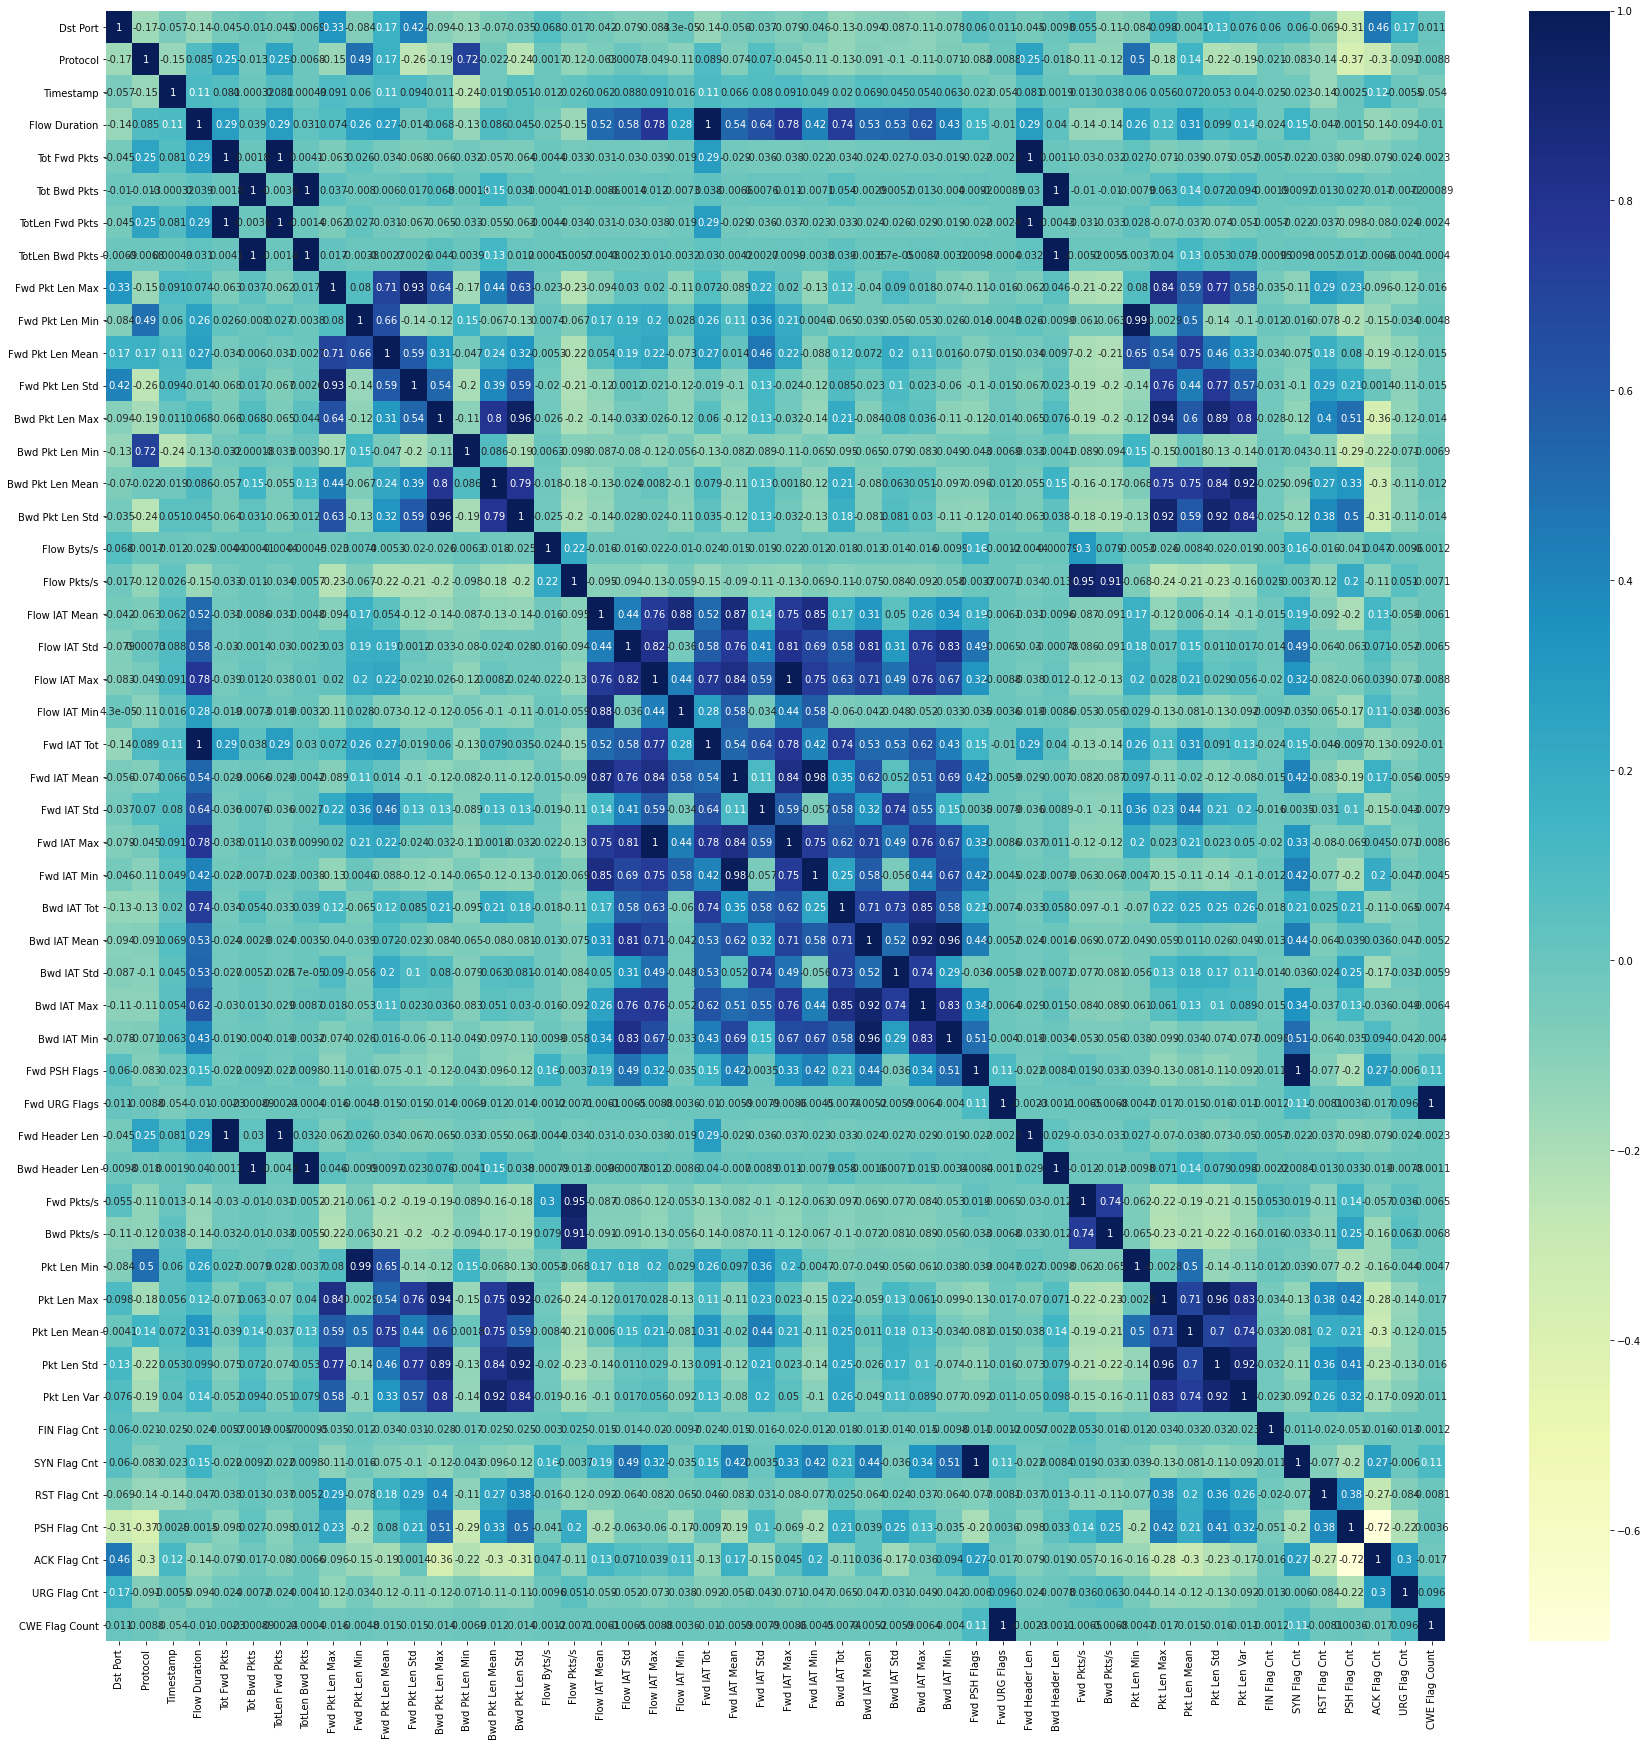

In [40]:
from matplotlib import pyplot as plt  
import seaborn as sns
fig= plt.figure(figsize=(30,30))
sns.heatmap(X_data.corr(), annot=True,cmap="YlGnBu")

In [41]:
def get_correlation_high(X_data,threshold): #Findout the features with the correlation value greater the 0.85
    corr_col=set()
    corrmat=X_data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [42]:
corelated_features=get_correlation_high(X_data,0.95) #spot the highly co realted features in the dataset 
corelated_features

{'Bwd Header Len',
 'Bwd IAT Min',
 'Bwd Pkt Len Std',
 'CWE Flag Count',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Fwd IAT Tot',
 'Fwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Std',
 'SYN Flag Cnt',
 'TotLen Bwd Pkts',
 'TotLen Fwd Pkts'}

In [43]:
corr=list(corelated_features)
corr

['SYN Flag Cnt',
 'Fwd IAT Min',
 'Fwd IAT Max',
 'TotLen Bwd Pkts',
 'TotLen Fwd Pkts',
 'Fwd IAT Tot',
 'Bwd IAT Min',
 'Fwd Header Len',
 'Bwd Header Len',
 'Pkt Len Min',
 'CWE Flag Count',
 'Fwd Pkts/s',
 'Bwd Pkt Len Std',
 'Pkt Len Std']

In [44]:
for i in corr: #dropping the highly corelated features from the dataset 
  final_dataset.drop(labels=[i],axis=1,inplace=True)

In [45]:
final_dataset.shape

(152329, 37)

In [46]:
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Var',
       'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'Label'],
      dtype='object')

# 4. Modeling 

4.1 Splitting the datset to train and test 

In [ ]:
y = final_dataset['Label'] #Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
X = final_dataset.drop(['Label'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 101) 

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
XGBpredictions = xgb.predict(X_test)
print('the accuracy of SCG Classfier with hinge loss:',accuracy_score(y_test,XGBpredictions))

the accuracy of SCG Classfier with hinge loss: 0.9793157791056537


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ADBClassifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
ADBClassifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
ADBCpredictions = ADBClassifier.predict(X_test)
print('the accuracy of SCG Classfier with hinge loss:',accuracy_score(y_test,ADBCpredictions))

the accuracy of SCG Classfier with hinge loss: 0.9750694946045921


4.2 Applying the Standard SVC model and checking the performance metrices

In [ ]:
from sklearn.svm import SVC 
model = SVC() 
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix 
print('the accuracy of Standard SVC:',accuracy_score(y_test,predictions))

print(classification_report(y_test, predictions)) 

the accuracy of Standard SVC: 0.5327628468878578
              precision    recall  f1-score   support

           0       0.53      1.00      0.70     24343
           1       0.00      0.00      0.00     21349

    accuracy                           0.53     45692
   macro avg       0.27      0.50      0.35     45692
weighted avg       0.28      0.53      0.37     45692



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observation:

1. The standard SVC model is behaving worse with this data, the overall accuarcy has been just 0.5337
2. And clealry this model is overfitting by seeing the Precison and recall values.
3. Hence we should perform some hypertuning or use Kernal SVMs to deal with this data


4.3 Applying the SGD Classifier with Hinge Loss

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDmodel = SGDClassifier(loss="hinge", penalty="l2")
SGDmodel.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
SGDpredictions = SGDmodel.predict(X_test)
print('the accuracy of SCG Classfier with hinge loss:',accuracy_score(y_test,SGDpredictions))

the accuracy of SCG Classfier with hinge loss: 0.4676695351332414


Observations:

The model performance is worse by appying the SGD classifier with hinge loss.
Appyling SGD for this dataset will not be the best idea here

4.4 Applying the SGD Classifier with Hinge Loss on different iterations

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

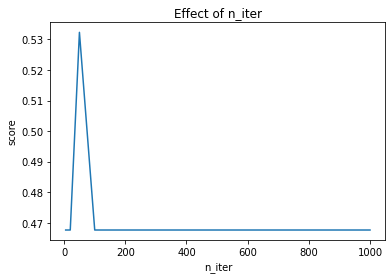

In [ ]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    SGDmodel = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    SGDmodel.fit(X_train, y_train)
    SGDpredictions = SGDmodel.predict(X_test)
    scores.append(accuracy_score(y_test,SGDpredictions))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

Observations:

1. The  performance of the SVM SGD with hinge loss on diifrent iteration  is also very poor.
2. With different iterations the performance is not improving , with increasing iterations the model score is staying stagnent here. 

4.5 Applying the Logistic regression SGD Classifier with Log Loss on different iterations

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

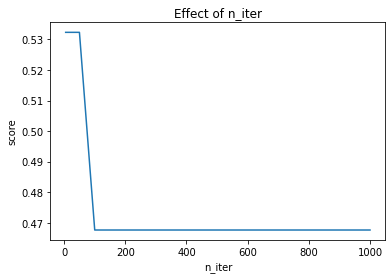

In [ ]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    SGDmodel = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    SGDmodel.fit(X_train, y_train)
    SGDpredictions = SGDmodel.predict(X_test)
    scores.append(accuracy_score(y_test,SGDpredictions))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

Observations:

1. With SGD Log loss the score is still worse, the accuracy is poor with diffrent iterations
2. The Accuracy score has stopped increasing after iterations

4.6 Applying the Decsion Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=0)

DT_clf.fit(X_train, y_train)
DT_pred=DT_clf.predict(X_test)
print('the accuracy',accuracy_score(y_test,DT_pred))

the accuracy 0.9859204274234163


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
confusion_matrix(y_test,DT_pred)

array([[23968,   343],
       [  300, 21058]])

In [ ]:
print(classification_report(y_test, DT_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24311
           1       0.98      0.99      0.98     21358

    accuracy                           0.99     45669
   macro avg       0.99      0.99      0.99     45669
weighted avg       0.99      0.99      0.99     45669



Observations:

1. The DT Algorithm seems to be performing better than the other SVM and LR models.
2. The model is producing better accuracy score that by applying SVM and LR
3. With confusion matrix  we could see that the model is separating  the bening and anamlous requests in a decent way.


In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}
DTclf= GridSearchCV(DT(),parameters)
DTclf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 50],
                     

In [ ]:
print('Best score: ',DTclf.best_score_)
print('Parameters with best score: ',DTclf.best_params_)

Best score:  0.9868619873509787
Parameters with best score:  {'max_depth': 50, 'min_samples_split': 10}


In [ ]:
Best_DT_clf = DT(max_depth=50, min_samples_split=10, random_state=0)
Best_DT_clf.fit(X_train, y_train)
H_DT_pred=Best_DT_clf.predict(X_test)
print('the accuracy',accuracy_score(y_test,H_DT_pred))

the accuracy 0.9871904355251921


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
confusion_matrix(y_test,DT_pred)

array([[23968,   343],
       [  300, 21058]])

In [ ]:
print(classification_report(y_test, DT_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24311
           1       0.98      0.99      0.98     21358

    accuracy                           0.99     45669
   macro avg       0.99      0.99      0.99     45669
weighted avg       0.99      0.99      0.99     45669



Observation:

1. Post the Hyperparamater tuning and applying the best parameters the model accuracy had improved in a very small amount.
2. There is not a bigger but Hyperparameter tuning should be done for better optimized results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)
RF_pred=RF_model.predict(X_test)
print('the accuracy of RF model',accuracy_score(y_test,RF_pred))

the accuracy of RF model 0.9842343821848518


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
confusion_matrix(y_test,RF_pred)

array([[23966,   345],
       [  375, 20983]])

In [ ]:
print(classification_report(y_test, RF_pred)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     24311
           1       0.98      0.98      0.98     21358

    accuracy                           0.98     45669
   macro avg       0.98      0.98      0.98     45669
weighted avg       0.98      0.98      0.98     45669



Observation:

1. The DT based Ensemble model seems to be producing better results.
2. Comparing to the RF results with the DT results both are more are less the same. But DT seems to be producing better results in terms of seperating the Being and anamalous requests.
3. This is interpreted clearly via the confusion matrix
4. Hence DT will be the better algorithm here

Summary:

1. The DDOS dataset used here is a multiclass dataset due to severe imbalence in the class label we have built the primary model as a Binary classification model converting all the attacks as 0 and Bening requests to be 1.
2. We have come to a conclusion that the DT Algorithm can be the best algorithm for the Binary classification model.

**Ensembling **

In [51]:
y = final_dataset['Label'] #Splitting the Xi and Yi for ensembling 
X = final_dataset.drop(['Label'],axis=1)

In [52]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size = 0.2, random_state = 101)  #Doing the 80-20 split

In [53]:
data = pd.concat([X1_train, y1_train], axis=1) #taking the 80 split alone
data.shape

(121883, 38)

In [54]:
EightyPer_Y=data['Label'] #seperating the class labels from 80% split
EightyPer_X=data.drop(['Label'],axis=1)
D1_X, D2_X, D1_Y, D2_Y = train_test_split(EightyPer_X,EightyPer_Y,test_size = 0.5, random_state = 101) #Doing the 50-50 split on the 80% datset 

In [ ]:
D1=pd.concat([D1_X,D1_Y],axis=1) #Forming D1 and D2
D1.shape
print('the shape of D1',D1.shape)
D2=pd.concat([D2_X,D2_Y],axis=1)
print('the shape of D2',D2.shape)

the shape of D1 (60908, 32)
the shape of D2 (60908, 32)


In [ ]:
S1=D1.sample(n=60908, replace=True, random_state=1) # sampling with replacement on D1 dataset #taking 6 sample sets
S2=D1.sample(n=60908, replace=True, random_state=1)
S3=D1.sample(n=60908, replace=True, random_state=1)
S4=D1.sample(n=60908, replace=True, random_state=1)
S5=D1.sample(n=60908, replace=True, random_state=1)
S6=D1.sample(n=60908, replace=True, random_state=1)

In [ ]:
S1y = S1['Label']  #samples and its coressponding class labels
S1X = S1.drop(['Label'],axis=1)
S2y = S2['Label'] 
S2X = S2.drop(['Label'],axis=1)
S3y = S3['Label'] 
S3X = S3.drop(['Label'],axis=1)
S4y = S4['Label'] 
S4X = S4.drop(['Label'],axis=1)
S5y = S5['Label'] 
S5X = S5.drop(['Label'],axis=1)
S6y = S6['Label'] 
S6X = S6.drop(['Label'],axis=1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier #fitting the base model DT with then D1 samples
Base_model=DecisionTreeClassifier()

BS1=Base_model.fit(S1X,S1y)
BS2=Base_model.fit(S2X,S2y)
BS3=Base_model.fit(S3X,S3y)
BS4=Base_model.fit(S4X,S4y)
BS5=Base_model.fit(S5X,S5y)
BS6=Base_model.fit(S6X,S6y)

In [ ]:
model1=Base_model.predict(D2_X) #passing the D2 train to get model predict 
model2=Base_model.predict(D2_X)
model3=Base_model.predict(D2_X)
model4=Base_model.predict(D2_X)
model5=Base_model.predict(D2_X)
model6=Base_model.predict(D2_X)

In [ ]:
BS1=model1.reshape(-1,1)
BS2=model2.reshape(-1,1)
BS3=model3.reshape(-1,1)
BS4=model4.reshape(-1,1)
BS5=model5.reshape(-1,1)
BS6=model6.reshape(-1,1)

In [ ]:
D_meta = np.vstack((BS1,BS2,BS3,BS4,BS5,BS6)) #creating Dataset out of the n-models predictions
print('The length of the D_meta data',len(D_meta))
D_meta_data=D_meta[:60908] #sampling only the required datapoints
print('Lenght of meta data post Sampling ',len(D_meta_data))

The length of the D_meta data 365448
Lenght of meta data post Sampling  60908


In [ ]:
from xgboost import XGBClassifier #taking the XGB as the meta model and passing the meta data and the D2 class labels

xgb = XGBClassifier(n_estimators=100)
xgb.fit(D_meta_data, D2_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
test_pred1=Base_model.predict(X1_test) #passing 20 percent test data which was split at the first stage
test_pred2=Base_model.predict(X1_test)
test_pred3=Base_model.predict(X1_test)
test_pred4=Base_model.predict(X1_test)
test_pred5=Base_model.predict(X1_test)
test_pred6=Base_model.predict(X1_test)

In [ ]:
TP1=test_pred1.reshape(-1,1) #test prediction results
TP2=test_pred2.reshape(-1,1)
TP3=test_pred3.reshape(-1,1)
TP4=test_pred4.reshape(-1,1)
TP5=test_pred5.reshape(-1,1)
TP6=test_pred6.reshape(-1,1)

In [ ]:
D_test_meta = np.vstack((TP1,TP2,TP3,TP4,TP5,TP6)) #Stacking up the test prediction results 

In [ ]:
D_test_meta=D_test_meta[:30455]

In [ ]:
pred_final = xgb.predict(D_test_meta) #passing the final dataset to the meta model

0.9846987358397636

**Custom Implementation**

In [47]:
Y=pd.DataFrame(final_dataset['Label'],columns=['Label']) #Splitting the Xi and Yi for ensembling 
X = final_dataset.drop(['Label'],axis=1)

In [48]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size = 0.2, random_state = 101) #Doing the 80-20 split

In [51]:
def sampling(n_estimators,D1_data):#sampling Randomly 
  size=len(D1_data)
  samples=[]
  for i in range(n_estimators):
    S=D1_data.sample(n=size, replace=True, random_state=60000)
    samples.append(S)
  return samples

def splitting(samples,n_estimators):#splitting Xi and Yi 
  Xi=[] 
  Yi=[]
  for i in range(n_estimators):
    a=samples[i]
    S_Yi=a['Label']
    S_Xi=a.drop(['Label'],axis=1)

    Xi.append(S_Xi)
    Yi.append(S_Yi)
  return Xi,Yi

def modeling(n_estimators,Xi,Yi): #training on the base model
  from sklearn.tree import DecisionTreeClassifier
  Base_model=DecisionTreeClassifier()
 
  for i in range(n_estimators):
    BS=Base_model.fit(Xi[i],Yi[i])

  return BS

def base_pred(BS,D2_X_test,n_estimators):#pred DT with D2_X_test
  samples_prediction=[]

  for i in range(n_estimators):
    predictions=BS.predict(D2_X_test)
    samples_prediction.append(predictions)

  return samples_prediction



def reshape(samples_prediction,n_estimators):#reshape 
  SP_meta=[]
  for i in range(n_estimators):
    SP_meta=samples_prediction[i].reshape(-1,1)
  return SP_meta

def xgb_model(meta_samples,D2_Y_test): #XGB 
  from xgboost import XGBClassifier

  meta= XGBClassifier(n_estimators=100)
  meta.fit(meta_samples, D2_Y_test)

  return meta



def test_pred(Base_models,twenty_test_pred,n_estimators):#test pred 

  test_prediction=[]
  for i in range(n_estimators):
    predictions=Base_models.predict(X_test)
    test_prediction.append(predictions)

  return test_prediction

  

def custom_ensemble(X_train,y_train,X_test,y1_test,n_estimators):

  D1_X_train,D2_X_test,D1_Y_train,D2_Y_test=train_test_split(X_train,y_train,test_size = 0.5) #doing 50-50 split 

  
  D1_data=pd.concat([D1_X_train,D1_Y_train],axis=1)
  D2_data=pd.concat([D2_X_test,D2_Y_test],axis=1)

  D_samples=sampling(n_estimators,D1_data)#sampling from D1
  Xi,Yi=splitting(D_samples,n_estimators)#split xi and yi of the samples
  Base_models=modeling(n_estimators,Xi,Yi)#training the DT model with the samples
  samples_prediction=base_pred(Base_models,D2_X_test,n_estimators)#precicting using the D2 test
  meta_samples=reshape(samples_prediction,n_estimators)#reshape
  meta_model=xgb_model(meta_samples,D2_Y_test)#calling XGB model
  twenty_test_pred=base_pred(Base_models,X_test,n_estimators)
  tp_samples=reshape(twenty_test_pred,n_estimators)#reshape
  pred_final = meta_model.predict(tp_samples)
  from sklearn.metrics import accuracy_score 
  acc=accuracy_score(y1_test,pred_final)

  print('the accuracy for the custom ensemble implementation',acc)


In [52]:
custom_ensemble(X1_train,y1_train,X1_test,y1_test,40)

the accuracy for the custom ensemble implementation 0.9840149675047594
